# Task: Software Defect Prediction via Convolutional Neural Network
## M√¥ t·∫£ b√†i to√°n
D·ª±a v√†o paper IEEE 2017 - DP-CNN ƒë·ªÅ xu·∫•t 1 phu∆°ng ph√°p m·ªõi, DP-CNN (Defect Prediction via Convolutional Neural Network) l√† m·ªôt ph∆∞∆°ng ph√°p d·ª± ƒëo√°n l·ªói ph·∫ßn m·ªÅm b·∫±ng c√°ch k·∫øt h·ª£p h·ªçc s√¢u v·ªõi c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng. Thay v√¨ ch·ªâ d·ª±a v√†o c√°c ƒë·∫∑c tr∆∞ng th·ªß c√¥ng nh∆∞ ƒë·ªô ph·ª©c t·∫°p m√£ ngu·ªìn, DP-CNN t·ª± ƒë·ªông h·ªçc ƒë·∫∑c tr∆∞ng ng·ªØ nghƒ©a v√† c·∫•u tr√∫c t·ª´ c√¢y C√∫ ph√°p Tr·ª´u t∆∞·ª£ng (AST) b·∫±ng CNN, sau ƒë√≥ k·∫øt h·ª£p v·ªõi c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng ƒë·ªÉ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c.
## Ph∆∞∆°ng ph√°p ƒë·ªÅ xu·∫•t
1Ô∏è‚É£ Ph√¢n t√≠ch m√£ ngu·ªìn th√†nh c√¢y AST, tr√≠ch xu·∫•t token quan tr·ªçng.

2Ô∏è‚É£ M√£ h√≥a token th√†nh vector s·ªë b·∫±ng k·ªπ thu·∫≠t word embedding.

3Ô∏è‚É£ S·ª≠ d·ª•ng CNN ƒë·ªÉ h·ªçc ƒë·∫∑c tr∆∞ng ng·ªØ nghƒ©a v√† c·∫•u tr√∫c t·ª´ m√£ ngu·ªìn.

4Ô∏è‚É£ K·∫øt h·ª£p v·ªõi ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng ƒë·ªÉ t·ªëi ∆∞u d·ª± ƒëo√°n.

5Ô∏è‚É£ Hu·∫•n luy·ªán m√¥ h√¨nh v√† ph√¢n lo·∫°i file l√† "c√≥ l·ªói" ho·∫∑c "kh√¥ng l·ªói".

# 0. Ph√¢n t√≠ch d·ªØ li·ªáu

- D·ª± ki·∫øn: L·∫•y t·∫≠p Synapse-1.1 ƒë·ªÉ trainning v√† t·∫≠p Synapse-1.2 ƒë·ªÉ test
- T·∫£i b·ªô source code c·ªßa b·ªô Synapse-1.1 v√† Synapse-1.2 t·ª´ archive.apache.org.
- ƒê·ªçc d·ªØ li·ªáu csv ch·ª©a th√¥ng tin v·ªÅ c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng v·ªÅ ph·∫ßn m·ªÅm v√† label cho bi·∫øt code l·ªói hay kh√¥ng
- L·ªçc ch·ªâ l·∫•y nh·ªØng file source code c√≥ trong file csv ƒë√£ ph√¢n t√≠ch

## T·∫£i b·ªô source code tr√™n archive.appache.org

In [1]:


!wget https://archive.apache.org/dist/synapse/1.1/synapse-1.1-src.tar.gz
!tar -xvzf synapse-1.1-src.tar.gz

!wget https://archive.apache.org/dist/synapse/1.2/synapse-1.2-src.tar.gz
!tar -xvzf synapse-1.2-src.tar.gz


--2025-03-24 17:14:45--  https://archive.apache.org/dist/synapse/1.1/synapse-1.1-src.tar.gz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3955793 (3.8M) [application/x-gzip]
Saving to: ‚Äòsynapse-1.1-src.tar.gz‚Äô

synapse-1.1-src.tar 100%[===================>]   3.77M  1.87MB/s    in 2.0s    

2025-03-24 17:14:48 (1.87 MB/s) - ‚Äòsynapse-1.1-src.tar.gz‚Äô saved [3955793/3955793]

synapse-1.1-src/repository/conf/
synapse-1.1-src/repository/conf/sample/
synapse-1.1-src/repository/conf/sample/resources/
synapse-1.1-src/repository/conf/sample/resources/policy/
synapse-1.1-src/repository/conf/sample/resources/endpoint/
synapse-1.1-src/repository/conf/sample/resources/proxy/
synapse-1.1-src/repository/conf/sample/resources/spring/
synapse-1.1-src/repository/conf/sample/resources/script/
synapse-1.1-src/repos

## T·∫£i b·ªô d·ªØ li·ªáu Apache ch·ª©a c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng

In [2]:
import os
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/synapse-1.1.csv"
test_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/synapse-1.2.csv"

train_csv = pd.read_csv(train_csv_path)
test_csv = pd.read_csv(test_csv_path)


Mounted at /content/drive


# 1. Ti·ªÅn x·ª≠ l√≠ d·ªØ li·ªáu

## Chu·∫©n ho√° d·ªØ li·ªáu gi·ªØa 2 d·∫°ng d·ªØ li·ªáu v√† lo·∫°i b·ªè

### Chu·∫©n ho√° gi·ªØa 2 d·∫°ng d·ªØ li·ªáu (csv v√† file source code)

In [3]:
# Chu·∫©n h√≥a t√™n file t·ª´ CSV ƒë·ªÉ ph√π h·ª£p v·ªõi th∆∞ m·ª•c tools/
def convert_csv_name_to_java_filename(csv_name):
    """
    Chuy·ªÉn:
    'org.apache.synapse.config.xml.ProxyServiceFactory' ‚Üí 'config/xml/ProxyServiceFactory.java'

    C√°ch l√†m:
    - T√¨m 'synapse.' trong ƒë∆∞·ªùng d·∫´n, l·∫•y ph·∫ßn sau n√≥ l√†m th∆∞ m·ª•c g·ªëc.
    - N·∫øu kh√¥ng c√≥ 'synapse.', gi·ªØ nguy√™n t√™n v√† th√™m .java
    """
    parts = csv_name.split('.')
    if 'synapse' in parts:
        index = parts.index('synapse') + 1  # L·∫•y ph·∫ßn sau 'synapse'
        return "/".join(parts[index:]) + ".java"
    return csv_name.replace('.', '/') + ".java"


# H√†m l·∫•y t·∫•t c·∫£ file Java trong th∆∞ m·ª•c m√£ ngu·ªìn (bao g·ªìm t·∫•t c·∫£ th∆∞ m·ª•c con trong tools/)
def get_all_java_files(directory):
    """L·∫•y t·∫•t c·∫£ file Java trong th∆∞ m·ª•c tools/ """
    java_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".java"):
                java_files.append(os.path.join(root, file))
    return java_files


# Chuy·ªÉn ƒë∆∞·ªùng d·∫´n file Java th√†nh d·∫°ng ƒë·ªÉ so s√°nh v·ªõi CSV
def convert_java_path_to_filename(java_path, base_dir):
    """Chuy·ªÉn ƒë∆∞·ªùng d·∫´n file Java th√†nh t√™n t∆∞∆°ng ƒë∆∞∆°ng trong CSV"""
    relative_path = os.path.relpath(java_path, base_dir)  # L·∫•y ƒë∆∞·ªùng d·∫´n t∆∞∆°ng ƒë·ªëi
    return relative_path.replace("\\", "/")  # ƒê·∫£m b·∫£o d·∫°ng Linux-style path

In [4]:
# L·∫•y danh s√°ch file Java t·ª´ CSV (gi·ªØ ƒë√∫ng t·∫ßng th∆∞ m·ª•c `ant/`, `mail/`...)
train_csv_files = set(train_csv['name'].apply(convert_csv_name_to_java_filename))
test_csv_files = set(test_csv['name'].apply(convert_csv_name_to_java_filename))

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn m√£ ngu·ªìn Apache Ant (l·∫•y to√†n b·ªô tools/)
train_dir = "synapse-1.1-src/modules/core/src/main/java/org/apache/synapse"
test_dir = "synapse-1.2-src/modules/core/src/main/java/org/apache/synapse"

# L·∫•y t·∫•t c·∫£ file Java t·ª´ th∆∞ m·ª•c m√£ ngu·ªìn
train_files_all = get_all_java_files(train_dir)
test_files_all = get_all_java_files(test_dir)

# T·∫°o danh s√°ch file t·ª´ m√£ ngu·ªìn ·ªü d·∫°ng `ant/taskdefs/Property.java`
train_files_as_java = {convert_java_path_to_filename(f, train_dir) for f in train_files_all}
test_files_as_java = {convert_java_path_to_filename(f, test_dir) for f in test_files_all}

# Ki·ªÉm tra s·ªë l∆∞·ª£ng file kh·ªõp gi·ªØa CSV v√† m√£ ngu·ªìn
matched_train_files = train_files_as_java.intersection(train_csv_files)
matched_test_files = test_files_as_java.intersection(test_csv_files)

print(f"S·ªë file trong CSV (synapse-1.1): {len(train_csv_files)}")
print(f"S·ªë file c√≥ trong m√£ ngu·ªìn synapse-1.1: {len(train_files_all)}")
print(f"S·ªë file tr√πng kh·ªõp gi·ªØa CSV v√† m√£ ngu·ªìn synapse-1.1: {len(matched_train_files)}")

print(f"S·ªë file trong CSV (synapse-1.2): {len(test_csv_files)}")
print(f"S·ªë file c√≥ trong m√£ ngu·ªìn Ant synapse-1.2: {len(test_files_all)}")
print(f"S·ªë file tr√πng kh·ªõp gi·ªØa CSV v√† m√£ ngu·ªìn Ant synapse-1.2: {len(matched_test_files)}")



S·ªë file trong CSV (synapse-1.1): 222
S·ªë file c√≥ trong m√£ ngu·ªìn synapse-1.1: 222
S·ªë file tr√πng kh·ªõp gi·ªØa CSV v√† m√£ ngu·ªìn synapse-1.1: 222
S·ªë file trong CSV (synapse-1.2): 256
S·ªë file c√≥ trong m√£ ngu·ªìn Ant synapse-1.2: 258
S·ªë file tr√πng kh·ªõp gi·ªØa CSV v√† m√£ ngu·ªìn Ant synapse-1.2: 256


### Xo√° nh·ªØng file source code kh√¥ng tr√πng trong file CSV
Nh·∫≠n th·∫•y file source code th∆∞·ªùng c√≥ s·ªë l∆∞·ª£ng l·ªõn h∆°n so v·ªõi CSV. Ch√≠nh v√¨ th·∫ø, ta ch·ªâ l·∫•y nh·ªØng file source code v√† csv sau chu·∫©n ho√° c√≥ name tr√πng nhau ƒë·ªÉ c√≥ th·ªÉ k·∫øt h·ª£p c√°c ƒë·∫∑c tr∆∞ng sau khi hu·∫•n luy·ªán.

In [5]:
# Ch·ªâ gi·ªØ l·∫°i c√°c file Java c√≥ trong CSV
def get_java_files_by_csv(directory, csv_files):
    """Ch·ªâ l·∫•y file Java c√≥ trong danh s√°ch CSV"""
    matched_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            full_path = os.path.join(root, file)
            relative_path = convert_java_path_to_filename(full_path, directory)
            if relative_path in csv_files:
                matched_files.append(full_path)
    return matched_files

In [6]:
filtered_train_files = get_java_files_by_csv(train_dir, matched_train_files)
filtered_test_files = get_java_files_by_csv(test_dir, matched_test_files)

print(f"S·ªë file Java sau khi l·ªçc theo CSV (Ant 1.6): {len(filtered_train_files)}")
print(f"S·ªë file Java sau khi l·ªçc theo CSV (Ant 1.7): {len(filtered_test_files)}")

S·ªë file Java sau khi l·ªçc theo CSV (Ant 1.6): 222
S·ªë file Java sau khi l·ªçc theo CSV (Ant 1.7): 256


### L∆∞u l·∫°i file csv sau khi ƒë√£ x·ª≠ l√≠ v√† lo·∫°i b·ªè

In [7]:
# L·ªçc l·∫°i DataFrame ch·ªâ gi·ªØ c√°c file c√≥ trong Source Code
filtered_train_csv = train_csv[train_csv['name'].apply(convert_csv_name_to_java_filename).isin(matched_train_files)]
filtered_test_csv = test_csv[test_csv['name'].apply(convert_csv_name_to_java_filename).isin(matched_test_files)]

# L∆∞u l·∫°i CSV m·ªõi ch·ªâ ch·ª©a c√°c file c√≥ trong Source Code
filtered_train_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/filtered_synapse-1.1.csv"
filtered_test_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/filtered_synapse-1.2.csv"

filtered_train_csv.to_csv(filtered_train_csv_path, index=False)
filtered_test_csv.to_csv(filtered_test_csv_path, index=False)

print(f"File CSV m·ªõi ƒë√£ ƒë∆∞·ª£c l∆∞u: {filtered_train_csv_path}")
print(f"File CSV m·ªõi ƒë√£ ƒë∆∞·ª£c l∆∞u: {filtered_test_csv_path}")

# ƒê·ªçc d·ªØ li·ªáu t·ª´ file CSV m·ªõi
filtered_train_df = pd.read_csv(filtered_train_csv_path)
filtered_test_df = pd.read_csv(filtered_test_csv_path)

# In s·ªë l∆∞·ª£ng file c√≤n l·∫°i sau khi l·ªçc
print(f"S·ªë l∆∞·ª£ng file c√≤n l·∫°i trong CSV m·ªõi (synapse-1.1): {filtered_train_df.shape[0]}")
print(f"S·ªë l∆∞·ª£ng file c√≤n l·∫°i trong CSV m·ªõi (synapse-1.2): {filtered_test_df.shape[0]}")



File CSV m·ªõi ƒë√£ ƒë∆∞·ª£c l∆∞u: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/filtered_synapse-1.1.csv
File CSV m·ªõi ƒë√£ ƒë∆∞·ª£c l∆∞u: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/filtered_synapse-1.2.csv
S·ªë l∆∞·ª£ng file c√≤n l·∫°i trong CSV m·ªõi (synapse-1.1): 222
S·ªë l∆∞·ª£ng file c√≤n l·∫°i trong CSV m·ªõi (synapse-1.2): 256


## Chia data v√† ph√¢n lo·∫°i nh√£n



### Chuy·ªÉn b√†i to√°n Multi-label classification th√†nh b√†i to√°n Binary Label

In [8]:
# Chuy·ªÉn ƒë·ªïi label: N·∫øu bug >= 1 th√¨ g√°n th√†nh 1, ng∆∞·ª£c l·∫°i gi·ªØ nguy√™n
filtered_train_df['bug'] = filtered_train_df['bug'].apply(lambda x: 1 if x >= 1 else 0)
filtered_test_df['bug'] = filtered_test_df['bug'].apply(lambda x: 1 if x >= 1 else 0)

# Ki·ªÉm tra l·∫°i s·ªë l∆∞·ª£ng m·∫´u sau khi chu·∫©n h√≥a
print("S·ªë l∆∞·ª£ng m·ªói l·ªõp sau khi x·ª≠ l√Ω trong t·∫≠p train v√† validation (synapse-1.1):")
print(filtered_train_df['bug'].value_counts())

print("\n S·ªë l∆∞·ª£ng m·ªói l·ªõp sau khi x·ª≠ l√Ω trong t·∫≠p test (synapse-1.2):")
print(filtered_test_df['bug'].value_counts())


S·ªë l∆∞·ª£ng m·ªói l·ªõp sau khi x·ª≠ l√Ω trong t·∫≠p train v√† validation (synapse-1.1):
bug
0    162
1     60
Name: count, dtype: int64

 S·ªë l∆∞·ª£ng m·ªói l·ªõp sau khi x·ª≠ l√Ω trong t·∫≠p test (synapse-1.2):
bug
0    170
1     86
Name: count, dtype: int64


### Chia d·ªØ li·ªáu v√†o c√°c t·∫≠p train,test,validation

In [9]:
from sklearn.model_selection import train_test_split

# Chia t·∫≠p train th√†nh train v√† validation
train_df, val_df = train_test_split(filtered_train_df, test_size=0.2, random_state=42, stratify=filtered_train_df['bug'])
test_df = filtered_test_df

# L∆∞u t·∫≠p train, validation v√† test m·ªõi sau khi chu·∫©n h√≥a
train_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/train_data_synapse-1.1.csv"
val_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/val_data_synapse-1.1.csv"
test_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/test_data_synapse-1.2.csv"

# L∆∞u c√°c t·∫≠p d·ªØ li·ªáu v√†o c√°c file CSV t∆∞∆°ng ·ª©ng
train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

# In th√¥ng b√°o
print(f"D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: {train_csv_path}")
print(f"D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: {val_csv_path}")
print(f"D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: {test_csv_path}")


D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/train_data_synapse-1.1.csv
D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/val_data_synapse-1.1.csv
D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/test_data_synapse-1.2.csv


In [10]:
# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong m·ªói l·ªõp c·ªßa t·∫≠p train
print("S·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p train:")
print(train_df['bug'].value_counts())

# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong m·ªói l·ªõp c·ªßa t·∫≠p validation
print("\nS·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p validation:")
print(val_df['bug'].value_counts())

# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong m·ªói l·ªõp c·ªßa t·∫≠p test
print("\nS·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p test:")
print(test_df['bug'].value_counts())


S·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p train:
bug
0    129
1     48
Name: count, dtype: int64

S·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p validation:
bug
0    33
1    12
Name: count, dtype: int64

S·ªë l∆∞·ª£ng m·ªói l·ªõp trong t·∫≠p test:
bug
0    170
1     86
Name: count, dtype: int64


## Ki·ªÉm tra c√¢n b·∫±ng d·ªØ li·ªáu

### Visualization ph√¢n ph·ªëi d·ªØ li·ªáu d·ª±a v√†o nh√£n tr∆∞·ªõc khi processing

<ipython-input-11-b4a8b906e054>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_bug_counts.index, y=train_bug_counts.values, palette="viridis")
<ipython-input-11-b4a8b906e054>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_bug_counts.index, y=val_bug_counts.values, palette="viridis")
<ipython-input-11-b4a8b906e054>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_bug_counts.index, y=test_bug_counts.values, palette="viridis")


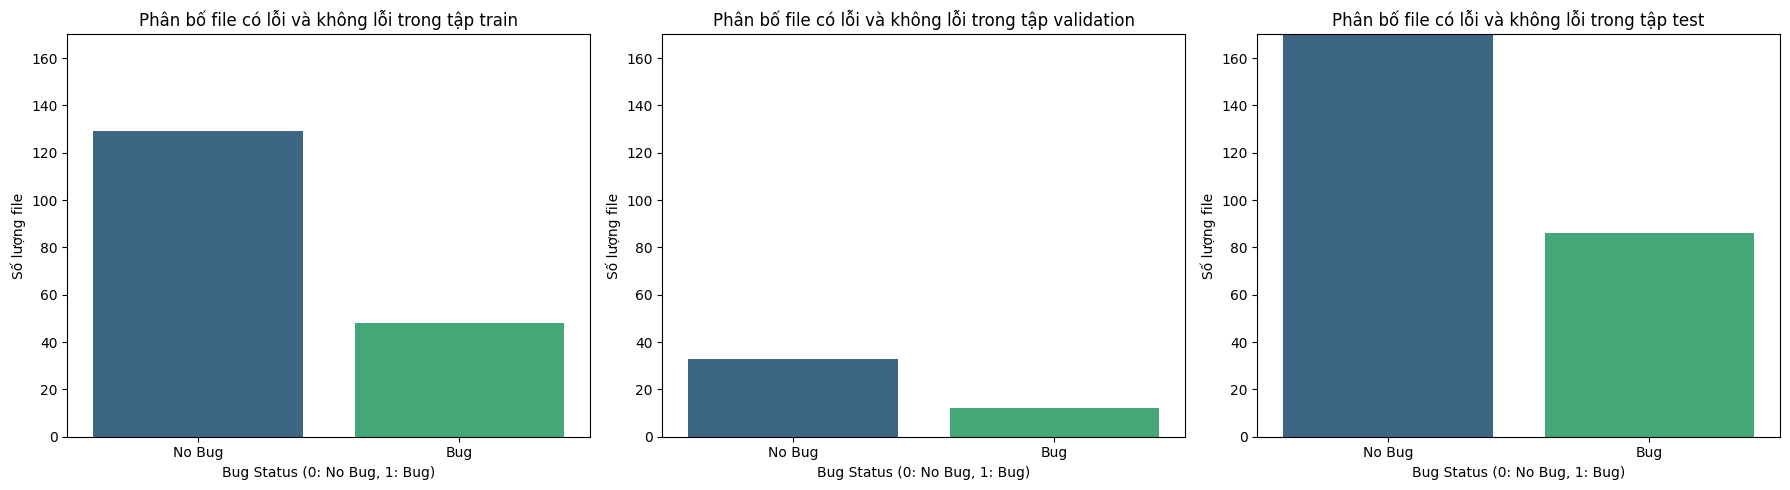

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong t·ª´ng l·ªõp c·ªßa t·ª´ng t·∫≠p (train, val, test)
train_bug_counts = train_df['bug'].value_counts()
val_bug_counts = val_df['bug'].value_counts()
test_bug_counts = test_df['bug'].value_counts()

# L·∫•y gi√° tr·ªã l·ªõn nh·∫•t trong c·∫£ 3 t·∫≠p ƒë·ªÉ l√†m tr·ª•c y chung
max_count = max(train_bug_counts.max(), val_bug_counts.max(), test_bug_counts.max())

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(18, 5))

# T·∫≠p train
plt.subplot(1, 3, 1)
sns.barplot(x=train_bug_counts.index, y=train_bug_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p train")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)  # c√πng thang ƒëo

# T·∫≠p validation
plt.subplot(1, 3, 2)
sns.barplot(x=val_bug_counts.index, y=val_bug_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p validation")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)  # c√πng thang ƒëo

# T·∫≠p test
plt.subplot(1, 3, 3)
sns.barplot(x=test_bug_counts.index, y=test_bug_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p test")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)  # c√πng thang ƒëo

# Hi·ªÉn th·ªã c√°c bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


Nh·∫≠n th·∫•y d·ªØ li·ªáu Bug ƒëang m·∫•t c√¢n b·∫±ng so v·ªõi d·ªØ li·ªáu No bug, c√≥ th·ªÉ x·ª≠ l√≠ b·∫±ng 1 s·ªë c√°ch nh∆∞ SMOTE, xo√° b·ªõt d·ªØ li·ªáu trong No Bug,.. Theo b√†i b√°o, ·ªü ƒë√¢y x·ª≠ l√≠ b·∫±ng c√°chnh√¢n ƒë√¥i c√°c instance t·ª´ l·ªõp

### X·ª≠ l√≠ m·∫•t c√¢n b·∫±ng d·ªØ li·ªáu

In [12]:
# Nh√¢n ƒë√¥i c√°c m·∫´u c·ªßa l·ªõp bug=1 trong c√°c t·∫≠p d·ªØ li·ªáu train, validation, test

# T·∫≠p train
bug_class_train = train_df[train_df['bug'] == 1]
duplicated_bug_class_train = pd.concat([bug_class_train, bug_class_train])
balanced_train_df = pd.concat([train_df[train_df['bug'] == 0], duplicated_bug_class_train])
balanced_train_df = balanced_train_df.reset_index(drop=True)

# T·∫≠p validation
bug_class_val = val_df[val_df['bug'] == 1]
duplicated_bug_class_val = pd.concat([bug_class_val, bug_class_val])
balanced_val_df = pd.concat([val_df[val_df['bug'] == 0], duplicated_bug_class_val])
balanced_val_df = balanced_val_df.reset_index(drop=True)

# T·∫≠p test
bug_class_test = test_df[test_df['bug'] == 1]
duplicated_bug_class_test = pd.concat([bug_class_test, bug_class_test])
balanced_test_df = pd.concat([test_df[test_df['bug'] == 0], duplicated_bug_class_test])
balanced_test_df = balanced_test_df.reset_index(drop=True)

# Ki·ªÉm tra k·∫øt qu·∫£
print(f"S·ªë l∆∞·ª£ng file trong t·∫≠p train sau c√¢n b·∫±ng:\n{balanced_train_df['bug'].value_counts()}")
print(f"S·ªë l∆∞·ª£ng file trong t·∫≠p validation sau c√¢n b·∫±ng:\n{balanced_val_df['bug'].value_counts()}")
print(f"S·ªë l∆∞·ª£ng file trong t·∫≠p test sau c√¢n b·∫±ng:\n{balanced_test_df['bug'].value_counts()}")


S·ªë l∆∞·ª£ng file trong t·∫≠p train sau c√¢n b·∫±ng:
bug
0    129
1     96
Name: count, dtype: int64
S·ªë l∆∞·ª£ng file trong t·∫≠p validation sau c√¢n b·∫±ng:
bug
0    33
1    24
Name: count, dtype: int64
S·ªë l∆∞·ª£ng file trong t·∫≠p test sau c√¢n b·∫±ng:
bug
1    172
0    170
Name: count, dtype: int64


In [13]:
# L∆∞u c√°c t·∫≠p d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng
balanced_train_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_train_data.csv"
balanced_val_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_val_data.csv"
balanced_test_csv_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_test_data.csv"

balanced_train_df.to_csv(balanced_train_csv_path, index=False)
balanced_val_df.to_csv(balanced_val_csv_path, index=False)
balanced_test_df.to_csv(balanced_test_csv_path, index=False)

print(f"D·ªØ li·ªáu train ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: {balanced_train_csv_path}")
print(f"D·ªØ li·ªáu validation ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: {balanced_val_csv_path}")
print(f"D·ªØ li·ªáu test ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: {balanced_test_csv_path}")

D·ªØ li·ªáu train ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_train_data.csv
D·ªØ li·ªáu validation ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_val_data.csv
D·ªØ li·ªáu test ƒë√£ ƒë∆∞·ª£c c√¢n b·∫±ng v√† l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/balanced_test_data.csv


### Visualization l·∫°i d·ªØ li·ªáu sau khi x·ª≠ l√≠

<ipython-input-14-48db479f43fe>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_train_counts.index, y=balanced_train_counts.values, palette="viridis")
<ipython-input-14-48db479f43fe>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_val_counts.index, y=balanced_val_counts.values, palette="viridis")
<ipython-input-14-48db479f43fe>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_test_counts.index, y=balanced_test_counts.values, palette="viridis")


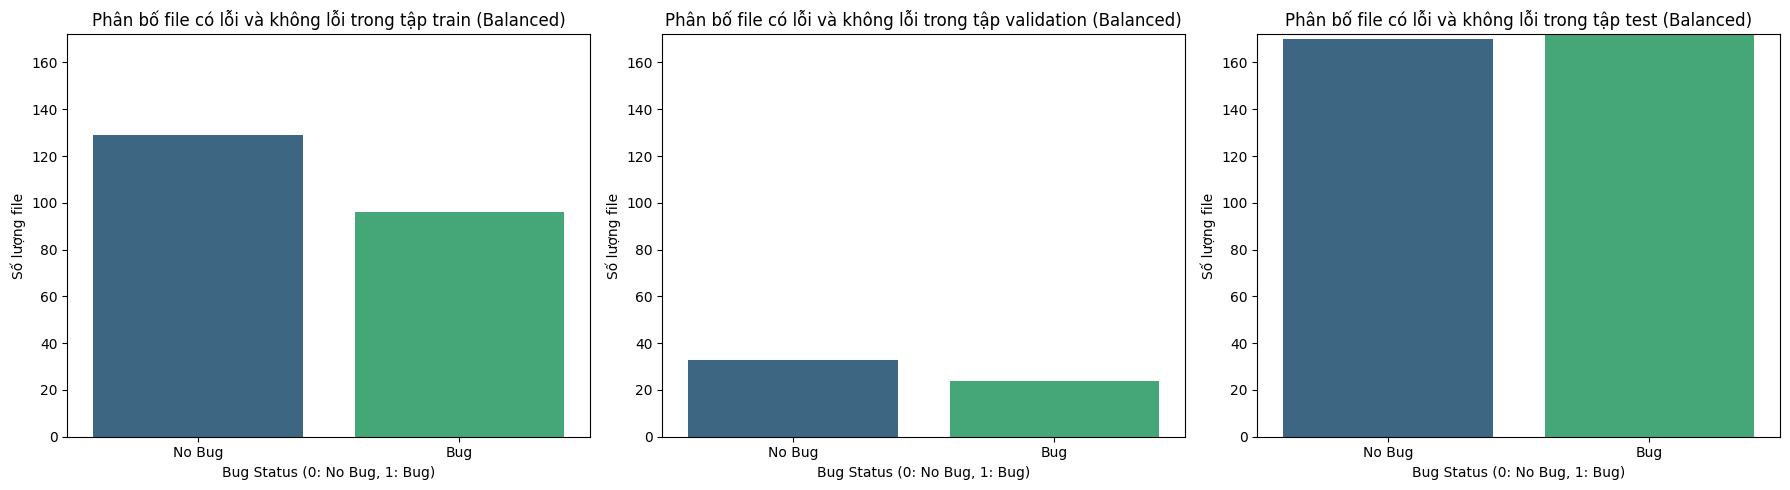

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ki·ªÉm tra s·ªë l∆∞·ª£ng m·∫´u trong t·ª´ng l·ªõp c·ªßa t·ª´ng t·∫≠p (train, val, test) sau c√¢n b·∫±ng
balanced_train_counts = balanced_train_df['bug'].value_counts()
balanced_val_counts = balanced_val_df['bug'].value_counts()
balanced_test_counts = balanced_test_df['bug'].value_counts()

# L·∫•y gi√° tr·ªã l·ªõn nh·∫•t l√†m thang ƒëo chung cho tr·ª•c y
max_count = max(balanced_train_counts.max(), balanced_val_counts.max(), balanced_test_counts.max())

# V·∫Ω bi·ªÉu ƒë·ªì cho t·∫≠p balanced
plt.figure(figsize=(18, 5))

# T·∫≠p train balanced
plt.subplot(1, 3, 1)
sns.barplot(x=balanced_train_counts.index, y=balanced_train_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p train (Balanced)")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)

# T·∫≠p validation balanced
plt.subplot(1, 3, 2)
sns.barplot(x=balanced_val_counts.index, y=balanced_val_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p validation (Balanced)")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)

# T·∫≠p test balanced
plt.subplot(1, 3, 3)
sns.barplot(x=balanced_test_counts.index, y=balanced_test_counts.values, palette="viridis")
plt.xlabel("Bug Status (0: No Bug, 1: Bug)")
plt.ylabel("S·ªë l∆∞·ª£ng file")
plt.title("Ph√¢n b·ªë file c√≥ l·ªói v√† kh√¥ng l·ªói trong t·∫≠p test (Balanced)")
plt.xticks(ticks=[0, 1], labels=["No Bug", "Bug"])
plt.ylim(0, max_count)

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


## L·ªçc ra c√°c source code c√≥ t√™n trong file csv


### T·∫≠p train

In [15]:
# Chu·∫©n h√≥a danh s√°ch file bug=1 t·ª´ CSV ƒë·ªÉ kh·ªõp v·ªõi source code
bug_files_csv = set(train_df['name'].apply(convert_csv_name_to_java_filename))

# Chu·∫©n h√≥a danh s√°ch file t·ª´ source code ƒë·ªÉ c√≥ d·∫°ng gi·ªëng CSV
source_files_formatted = set(convert_java_path_to_filename(f, train_dir) for f in filtered_train_files)

print(f"T·ªïng s·ªë file train c√≥ trong CSV: {len(bug_files_csv)}")
print(f"T·ªïng s·ªë file train+validation c√≥ trong source code: {len(source_files_formatted)}")

# L·ªçc ra c√°c file trong train_dir c√≥ t√™n tr√πng v·ªõi CSV
matched_files = bug_files_csv.intersection(source_files_formatted)

# L·ªçc danh s√°ch file t·ª´ train_dir ƒë·ªÉ ch·ªâ gi·ªØ c√°c file c√≥ trong matched_files
train_files_new = [f for f in filtered_train_files if convert_java_path_to_filename(f, train_dir) in matched_files]

train_new_df = pd.DataFrame({'name': train_files_new})
print(f"T·ªïng s·ªë file source code train c√≥ trong th∆∞ m·ª•c sau khi l·ªçc: {len(train_files_new)}")





T·ªïng s·ªë file train c√≥ trong CSV: 177
T·ªïng s·ªë file train+validation c√≥ trong source code: 222
T·ªïng s·ªë file source code train c√≥ trong th∆∞ m·ª•c sau khi l·ªçc: 177


### T·∫≠p validation

In [16]:
# Chu·∫©n h√≥a danh s√°ch file bug=1 t·ª´ CSV ƒë·ªÉ kh·ªõp v·ªõi source code
bug_files_csv = set(val_df['name'].apply(convert_csv_name_to_java_filename))

# Chu·∫©n h√≥a danh s√°ch file t·ª´ source code ƒë·ªÉ c√≥ d·∫°ng gi·ªëng CSV
source_files_formatted = set(convert_java_path_to_filename(f, train_dir) for f in filtered_train_files)

print(f"T·ªïng s·ªë file validation c√≥ trong CSV: {len(bug_files_csv)}")
print(f"T·ªïng s·ªë file train+validation c√≥ trong source code: {len(source_files_formatted)}")

# L·ªçc ra c√°c file trong train_dir c√≥ t√™n tr√πng v·ªõi CSV
matched_files = bug_files_csv.intersection(source_files_formatted)

# L·ªçc danh s√°ch file t·ª´ train_dir ƒë·ªÉ ch·ªâ gi·ªØ c√°c file c√≥ trong matched_files
val_dir_new = [f for f in filtered_train_files if convert_java_path_to_filename(f, train_dir) in matched_files]

# L·ªçc danh s√°ch file t·ª´ train_dir ƒë·ªÉ ch·ªâ gi·ªØ c√°c file c√≥ trong matched_files
val_files_new = [f for f in filtered_train_files if convert_java_path_to_filename(f, train_dir) in matched_files]

val_new_df= pd.DataFrame({'name': val_files_new})
print(f"T·ªïng s·ªë file source code validation c√≥ trong th∆∞ m·ª•c sau khi l·ªçc: {len(val_files_new)}")




T·ªïng s·ªë file validation c√≥ trong CSV: 45
T·ªïng s·ªë file train+validation c√≥ trong source code: 222
T·ªïng s·ªë file source code validation c√≥ trong th∆∞ m·ª•c sau khi l·ªçc: 45


## Nh√¢n ƒë√¥i file d·ªØ li·ªáu trong source code

ƒê·ªÉ ƒë·∫£m b·∫£o d·ªØ li·ªáu hu·∫•n luy·ªán ƒë∆∞·ª£c ƒë·ªìng b·ªô gi·ªØa CSV v√† m√£ ngu·ªìn,` c·∫ßn nh√¢n ƒë√¥i c√°c file source code t∆∞∆°ng ·ª©ng v·ªõi c√°c file ƒë√£ b·ªã nh√¢n ƒë√¥i trong CSV.

### T·∫≠p train

In [17]:
import shutil
# L·ªçc danh s√°ch file c√≥ bug=1 t·ª´ CSV
bug_train_csv = set(train_df[train_df['bug'] == 1]['name'].apply(convert_csv_name_to_java_filename))

# L·ªçc danh s√°ch file source code c√≥ bug=1
train_files_new_1 = [file for file in filtered_train_files if convert_java_path_to_filename(file, train_dir) in bug_train_csv]

print(f"T·ªïng s·ªë file bug=1 trong CSV_train: {len(bug_train_csv)}")
print(f"T·ªïng s·ªë file source code_train c√≥ bug=1: {len(train_files_new_1)}")

# Nh√¢n ƒë√¥i file source code c√≥ bug=1 v√† c·∫≠p nh·∫≠t danh s√°ch
duplicated_files = []
for file in train_files_new_1:
    duplicate_file_path = file.replace(".java", "_dup.java")  # T·∫°o t√™n file m·ªõi
    shutil.copy(file, duplicate_file_path)  # Sao ch√©p file
    duplicated_files.append(duplicate_file_path)

# C·∫≠p nh·∫≠t danh s√°ch filtered_train_files
train_files_new += duplicated_files  # Th√™m file nh√¢n ƒë√¥i v√†o danh s√°ch g·ªëc

# Ki·ªÉm tra l·∫°i s·ªë l∆∞·ª£ng file sau nh√¢n ƒë√¥i
print(f"\nS·ªë file source code g·ªëc (train set): {len(train_files_new) - len(duplicated_files)}")
print(f"S·ªë file source code nh√¢n ƒë√¥i: {len(duplicated_files)}")
print(f"T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: {len(train_files_new)}")

# Hi·ªÉn th·ªã danh s√°ch file ƒë√£ nh√¢n ƒë√¥i
print("\nDanh s√°ch file ƒë√£ nh√¢n ƒë√¥i:")
print(duplicated_files[:10])  # Hi·ªÉn th·ªã 10 file ƒë·∫ßu ti√™n


T·ªïng s·ªë file bug=1 trong CSV_train: 48
T·ªïng s·ªë file source code_train c√≥ bug=1: 48

S·ªë file source code g·ªëc (train set): 177
S·ªë file source code nh√¢n ƒë√¥i: 48
T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: 225

Danh s√°ch file ƒë√£ nh√¢n ƒë√¥i:
['synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/SynapseConstants_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/SynapseConfigUtils_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/SynapseConfiguration_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/TargetFactory_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/XMLConfigurationSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/TargetSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/SynapseXMLConfigurationSerializer_dup.java', 'synapse-1.1-

### T·∫≠p validation

In [18]:
import shutil

# L·ªçc danh s√°ch file c√≥ bug=1 t·ª´ CSV
bug_val_csv = set(val_df[val_df['bug'] == 1]['name'].apply(convert_csv_name_to_java_filename))

# L·ªçc danh s√°ch file source code c√≥ bug=1
val_files_new_1 = [file for file in val_files_new if convert_java_path_to_filename(file, train_dir) in bug_val_csv]

print(f"T·ªïng s·ªë file bug=1 trong CSV: {len(bug_val_csv)}")
print(f"T·ªïng s·ªë file source code c√≥ bug=1: {len(val_files_new_1)}")

# Nh√¢n ƒë√¥i file source code c√≥ bug=1 v√† c·∫≠p nh·∫≠t danh s√°ch
duplicated_files = []
for file in val_files_new_1:
    duplicate_file_path = file.replace(".java", "_dup.java")  # T·∫°o t√™n file m·ªõi
    shutil.copy(file, duplicate_file_path)  # Sao ch√©p file
    duplicated_files.append(duplicate_file_path)

# C·∫≠p nh·∫≠t danh s√°ch filtered_validation_files
val_files_new += duplicated_files  # Th√™m file nh√¢n ƒë√¥i v√†o danh s√°ch g·ªëc

# Ki·ªÉm tra l·∫°i s·ªë l∆∞·ª£ng file sau nh√¢n ƒë√¥i
print(f"\nS·ªë file source code g·ªëc (validation set): {len(val_files_new) - len(duplicated_files)}")
print(f"S·ªë file source code nh√¢n ƒë√¥i: {len(duplicated_files)}")
print(f"T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: {len(val_files_new)}")

# Hi·ªÉn th·ªã danh s√°ch file ƒë√£ nh√¢n ƒë√¥i
print("\nüìú Danh s√°ch file ƒë√£ nh√¢n ƒë√¥i:")
print(duplicated_files[:10])  # Hi·ªÉn th·ªã 10 file ƒë·∫ßu ti√™n


T·ªïng s·ªë file bug=1 trong CSV: 12
T·ªïng s·ªë file source code c√≥ bug=1: 12

S·ªë file source code g·ªëc (validation set): 45
S·ªë file source code nh√¢n ƒë√¥i: 12
T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: 57

üìú Danh s√°ch file ƒë√£ nh√¢n ƒë√¥i:
['synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/SendMediatorSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/AbstractMediatorSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/endpoints/EndpointFactory_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/endpoints/AddressEndpointFactory_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/endpoints/WSDLEndpointSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synapse/config/xml/endpoints/EndpointSerializer_dup.java', 'synapse-1.1-src/modules/core/src/main/java/org/apache/synaps

### T·∫≠p test

In [19]:
import shutil

# L·ªçc danh s√°ch file c√≥ bug=1 t·ª´ CSV
bug_test_csv = set(test_df[test_df['bug'] == 1]['name'].apply(convert_csv_name_to_java_filename))

# L·ªçc danh s√°ch file source code c√≥ bug=1
test_files_new_1 = [file for file in filtered_test_files if convert_java_path_to_filename(file, test_dir) in bug_test_csv]

print(f"T·ªïng s·ªë file bug=1 trong CSV: {len(bug_test_csv)}")
print(f"T·ªïng s·ªë file source code c√≥ bug=1: {len(test_files_new_1)}")

# Nh√¢n ƒë√¥i file source code c√≥ bug=1 v√† c·∫≠p nh·∫≠t danh s√°ch
duplicated_files = []
for file in test_files_new_1:
    duplicate_file_path = file.replace(".java", "_dup.java")  # T·∫°o t√™n file m·ªõi
    shutil.copy(file, duplicate_file_path)  # Sao ch√©p file
    duplicated_files.append(duplicate_file_path)

# C·∫≠p nh·∫≠t danh s√°ch filtered_test_files
filtered_test_files += duplicated_files  # Th√™m file nh√¢n ƒë√¥i v√†o danh s√°ch g·ªëc

# Ki·ªÉm tra l·∫°i s·ªë l∆∞·ª£ng file sau nh√¢n ƒë√¥i
print(f"\nS·ªë file source code g·ªëc (test set): {len(filtered_test_files) - len(duplicated_files)}")
print(f"S·ªë file source code nh√¢n ƒë√¥i: {len(duplicated_files)}")
print(f"T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: {len(filtered_test_files)}")

# üîπ 6. Hi·ªÉn th·ªã danh s√°ch file ƒë√£ nh√¢n ƒë√¥i
print("\nDanh s√°ch file ƒë√£ nh√¢n ƒë√¥i:")
print(duplicated_files[:10])  # Hi·ªÉn th·ªã 10 file ƒë·∫ßu ti√™n


T·ªïng s·ªë file bug=1 trong CSV: 86
T·ªïng s·ªë file source code c√≥ bug=1: 86

S·ªë file source code g·ªëc (test set): 256
S·ªë file source code nh√¢n ƒë√¥i: 86
T·ªïng s·ªë file source code sau nh√¢n ƒë√¥i: 342

Danh s√°ch file ƒë√£ nh√¢n ƒë√¥i:
['synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/ServerManager_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/SynapseException_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/SynapseServer_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/SynapseConstants_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/config/SynapseConfigurationBuilder_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/config/SynapseConfigUtils_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/config/SynapseConfiguration_dup.java', 'synapse-1.2-src/modules/core/src/main/java/org/apache/synapse/config/xml/Mediator

# 2. Ph√¢n t√≠ch c√¢y AST

In [20]:
!pip install javalang


In [21]:
import javalang

def extract_tokens_from_file(file_path):
    """Tr√≠ch xu·∫•t c√°c token quan tr·ªçng t·ª´ c√¢y AST c·ªßa m√£ ngu·ªìn Java"""
    try:
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            code = f.read()

        tokens = []
        tree = javalang.parse.parse(code)  # Ph√¢n t√≠ch m√£ ngu·ªìn th√†nh AST

        for path, node in tree:
            if isinstance(node, javalang.tree.MethodInvocation):
                tokens.append(node.member)
            elif isinstance(node, javalang.tree.ClassDeclaration):
                tokens.append(node.name)
            elif isinstance(node, javalang.tree.ConstructorDeclaration):
                tokens.append(node.name)
            elif isinstance(node, javalang.tree.VariableDeclarator):
                tokens.append(node.name)
            elif isinstance(node, javalang.tree.MemberReference):
                tokens.append(node.member)
            elif isinstance(node, javalang.tree.IfStatement):
                tokens.append("<IF>")
            elif isinstance(node, javalang.tree.ForStatement):
                tokens.append("<FOR>")
            elif isinstance(node, javalang.tree.WhileStatement):
                tokens.append("<WHILE>")
            elif isinstance(node, javalang.tree.CatchClause):
                tokens.append("<CATCH>")

        return tokens
    except Exception as e:
        print(f"L·ªói khi x·ª≠ l√Ω file {file_path}: {e}")
        return []


In [22]:
import javalang

def extract_tokens_from_file(file_path):
    """Tr√≠ch xu·∫•t c√°c token quan tr·ªçng t·ª´ c√¢y AST c·ªßa m√£ ngu·ªìn Java (c·∫£i ti·∫øn)."""
    try:
        with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
            code = f.read()

        tokens = []
        tree = javalang.parse.parse(code)  # Ph√¢n t√≠ch m√£ ngu·ªìn th√†nh AST

        for path, node in tree:
            # Tr√≠ch xu·∫•t t√™n Method v√† Constructor v·ªõi ti·ªÅn t·ªë 'METHOD_'
            if isinstance(node, javalang.tree.MethodDeclaration):
                tokens.append(f"METHOD_{node.name}")
            elif isinstance(node, javalang.tree.ConstructorDeclaration):
                tokens.append(f"METHOD_{node.name}")

            # L·∫•y danh s√°ch t√™n Class/Interface v·ªõi ti·ªÅn t·ªë 'CLASS_'
            elif isinstance(node, javalang.tree.ClassDeclaration) or isinstance(node, javalang.tree.InterfaceDeclaration):
                tokens.append(f"CLASS_{node.name}")

            # L·∫•y bi·∫øn v·ªõi ti·ªÅn t·ªë 'VAR_' ƒë·ªÉ ph√¢n bi·ªát
            elif isinstance(node, javalang.tree.VariableDeclarator):
                tokens.append(f"VAR_{node.name}")

            # L·∫•y c√°c th√†nh vi√™n class
            elif isinstance(node, javalang.tree.MemberReference):
                tokens.append(f"MEMBER_{node.member}")

            # Th√™m th√¥ng tin Annotation (n·∫øu c√≥)
            elif isinstance(node, javalang.tree.Annotation):
                tokens.append(f"ANNOTATION_{node.name}")

            elif isinstance(node, javalang.tree.IfStatement):
                tokens.append("<IF>")
            elif isinstance(node, javalang.tree.ForStatement):
                tokens.append("<FOR>")
            elif isinstance(node, javalang.tree.WhileStatement):
                tokens.append("<WHILE>")
            elif isinstance(node, javalang.tree.DoStatement):
                tokens.append("<DO>")
            elif isinstance(node, javalang.tree.SwitchStatement):
                tokens.append("<SWITCH>")
            elif hasattr(javalang.tree, "CaseStatement") and isinstance(node, javalang.tree.CaseStatement):
                tokens.append("<CASE>")
            elif isinstance(node, javalang.tree.TryStatement):
                tokens.append("<TRY>")
            elif isinstance(node, javalang.tree.ThrowStatement):
                tokens.append("<THROW>")
            elif isinstance(node, javalang.tree.CatchClause):
                tokens.append("<CATCH>")
            elif isinstance(node, javalang.tree.ReturnStatement):
                tokens.append("<RETURN>")

            # L·∫•y th√¥ng tin ki·ªÉu d·ªØ li·ªáu bi·∫øn
            elif isinstance(node, javalang.tree.LocalVariableDeclaration):
                for var in node.declarators:
                    tokens.append(f"VAR_{var.name}_TYPE_{node.type.name}")

            # L·∫•y ki·ªÉu d·ªØ li·ªáu tham s·ªë c·ªßa h√†m
            elif isinstance(node, javalang.tree.MethodDeclaration):
                for param in node.parameters:
                    tokens.append(f"PARAM_{param.name}_TYPE_{param.type.name}")

            # L·∫•y t√™n c√°c import ƒë·ªÉ hi·ªÉu b·ªëi c·∫£nh code
            elif isinstance(node, javalang.tree.Import):
                tokens.append(f"IMPORT_{node.path}")

        return tokens
    except Exception as e:
        print(f"L·ªói khi x·ª≠ l√Ω file {file_path}: {e}")
        return []


In [23]:
sample_file = filtered_train_files[9]  # L·∫•y m·ªôt file t·ª´ danh s√°ch ƒë√£ l·ªçc
sample_tokens = extract_tokens_from_file(sample_file)
print("Token t·ª´ file m·∫´u:", sample_tokens)

Token t·ª´ file m·∫´u: ['CLASS_Command', 'METHOD_execute']


In [24]:
# Tr√≠ch xu·∫•t token t·ª´ t·∫•t c·∫£ c√°c file trong t·∫≠p train v√† test
train_tokens = {file: extract_tokens_from_file(file) for file in train_files_new}
test_tokens = {file: extract_tokens_from_file(file) for file in filtered_test_files}
val_tokens = {file: extract_tokens_from_file(file) for file in val_files_new}
# Ki·ªÉm tra k·∫øt qu·∫£
print(f"S·ªë file ƒë√£ tr√≠ch xu·∫•t token (train): {len(train_tokens)}")
print(f"S·ªë file ƒë√£ tr√≠ch xu·∫•t token (validation): {len(val_tokens)}")
print(f"S·ªë file ƒë√£ tr√≠ch xu·∫•t token (test): {len(test_tokens)}")



S·ªë file ƒë√£ tr√≠ch xu·∫•t token (train): 225
S·ªë file ƒë√£ tr√≠ch xu·∫•t token (validation): 57
S·ªë file ƒë√£ tr√≠ch xu·∫•t token (test): 342


In [25]:
from google.colab import drive
import pickle
import os

drive.mount('/content/drive')
save_dir = "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/"
save_path = os.path.join(save_dir, "dp_cnn_tokens.pkl")
os.makedirs(save_dir, exist_ok=True)

#L∆∞u file v√†o th∆∞ m·ª•c trong Google Drive
data = {
    "train_tokens": train_tokens,
    "test_tokens": test_tokens,
    "val_tokens": val_tokens
}

with open(save_path, "wb") as f:
    pickle.dump(data, f)

print(f"File l∆∞u t·∫°i: {save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File l∆∞u t·∫°i: /content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/dp_cnn_tokens.pkl


# 3. Word embedding

- L√†m b√™n folder kh√°c: https://drive.google.com/file/d/13aXuvPECb4fUPLQEEVwSRNUCZQBukSur/view?usp=sharing
- Token sau khi embedding ƒë∆∞·ª£c l∆∞u v√†o trong file dp_cnn_embeddings.pkl c√≥ link: "/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/dp_cnn_embeddings.pkl"

In [26]:
import pickle
import numpy as np
from google.colab import drive
import os

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP/Task DP-CNN/dp_cnn_embeddings.pkl'


# M·ªü v√† ƒë·ªçc d·ªØ li·ªáu t·ª´ file .pkl
with open(file_path, 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train_embeddings']
X_test = data['X_test_embeddings']
X_val = data['X_val_embeddings']

print(f"D·ªØ li·ªáu train shape: {X_train.shape}")
print(f"D·ªØ li·ªáu validation shape: {X_val.shape}")
print(f"D·ªØ li·ªáu test shape: {X_test.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
D·ªØ li·ªáu train shape: (225, 100, 30)
D·ªØ li·ªáu validation shape: (57, 100, 30)
D·ªØ li·ªáu test shape: (342, 100, 30)


Ki·ªÉm tra l·∫°i nh√£n

In [27]:
import numpy as np

# Chuy·ªÉn nh√£n th√†nh NumPy array
y_train = np.array(balanced_train_df['bug'].values)  # 0 ho·∫∑c 1
y_val = np.array(balanced_val_df['bug'].values)  # 0 ho·∫∑c 1
y_test = np.array(balanced_test_df['bug'].values)  # 0 ho·∫∑c 1

print(f"Nh√£n train shape: {y_train.shape}")
print(f"Nh√£n val shape: {y_val.shape}")
print(f"Nh√£n test shape: {y_test.shape}")


Nh√£n train shape: (225,)
Nh√£n val shape: (57,)
Nh√£n test shape: (342,)


# 4. Hu·∫•n luy·ªán m·∫°ng CNN

- Hu·∫•n luy·ªán CNN ƒë·ªÉ tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ m√£ ngu·ªìn th√¥ng qua c√°c vector word embedding (d·∫°ng chu·ªói token).
- L·∫•y c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng t·ª´ file CSV
- Gh√©p n·ªëi ƒë·∫∑c tr∆∞ng CNN v√† ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng ƒë·ªÉ t·ªïng h·ª£p th√¥ng tin.
- D·ª± ƒëo√°n l·ªói ph·∫ßn m·ªÅm b·∫±ng l·ªõp Logistic Regression (l·ªõp Dense cu·ªëi c√πng v·ªõi sigmoid).

##Tr√≠ch xu·∫•t c√°c c·ªôt s·ªë t·ª´ CSV l√†m ƒë·∫ßu v√†o b·ªï sung

In [28]:
X_train_traditional = np.array(balanced_train_df.iloc[:, 1:-1].values)  # B·ªè c·ªôt ƒë·∫ßu ti√™n (name) v√† cu·ªëi c√πng (bug)
X_test_traditional = np.array(balanced_test_df.iloc[:, 1:-1].values)
X_val_traditional = np.array(balanced_val_df.iloc[:, 1:-1].values)

print(f"Traditional Features - Train shape: {X_train_traditional.shape}")
print(f"Traditional Features - Validation shape: {X_val_traditional.shape}")
print(f"Traditional Features - Test shape: {X_test_traditional.shape}")

print(X_train_traditional[1])

Traditional Features - Train shape: (225, 20)
Traditional Features - Validation shape: (57, 20)
Traditional Features - Test shape: (342, 20)
[  3.           2.           0.           9.          22.
   3.           0.           9.           3.           2.
 119.           0.           0.           0.75         0.55555556
   0.           0.          38.66666667   9.           3.3333    ]


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_traditional = scaler.fit_transform(X_train_traditional)
X_val_traditional = scaler.transform(X_val_traditional)
X_test_traditional = scaler.transform(X_test_traditional)


## ƒê·ªãnh nghƒ©a c·∫•u tr√∫c m·∫°ng n∆° ron v√† hu·∫•n luy·ªán

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

# ƒê·ªãnh nghƒ©a si√™u tham s·ªë t·ªëi ∆∞u
FILTERS = 250
KERNEL_SIZE = 5
DENSE_UNITS = 100
DROPOUT_RATE = 0.1
LEARNING_RATE = 0.001
NUM_TRADITIONAL_FEATURES = X_train_traditional.shape[1]  # S·ªë ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 30

input_layer_cnn = Input(shape=(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM))  # (None, 100, 30)

# CNN Layers
conv_layer_1 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(input_layer_cnn)
batch_norm_1 = BatchNormalization()(conv_layer_1)  # Batch Normalization
conv_layer_2 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(batch_norm_1)
batch_norm_2 = BatchNormalization()(conv_layer_2)  # Batch Normalization
pool_layer = GlobalMaxPooling1D()(batch_norm_2)

# Th√™m l·ªõp Dense v√† Dropout
dense_layer = Dense(DENSE_UNITS, activation='relu')(pool_layer)
dropout_layer = Dropout(DROPOUT_RATE)(dense_layer)

# L·∫•y Traditional Features v√† concatenate v·ªõi ƒë·∫ßu ra c·ªßa m·∫°ng CNN
input_layer_traditional = Input(shape=(NUM_TRADITIONAL_FEATURES,))
merged_features = Concatenate()([dropout_layer, input_layer_traditional])

# ƒê∆∞a qua l·ªõp dense
dense_2_layer = Dense(DENSE_UNITS, activation='relu', kernel_regularizer=l2(0.01))(merged_features)

# L·ªõp Logistic Regression (D·ª± ƒëo√°n l·ªói ph·∫ßn m·ªÅm)
output_layer = Dense(1, activation='sigmoid')(dense_2_layer)

# T·∫°o m√¥ h√¨nh t·ªïng h·ª£p
model = Model(inputs=[input_layer_cnn, input_layer_traditional], outputs=output_layer)

# Compile m√¥ h√¨nh v·ªõi learning rate th·∫•p h∆°n
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# S·ª≠ d·ª•ng ReduceLROnPlateau callback ƒë·ªÉ ƒëi·ªÅu ch·ªânh learning rate khi c·∫ßn thi·∫øt
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Hi·ªÉn th·ªã ki·∫øn tr√∫c m√¥ h√¨nh
model.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_5             ‚îÇ (None, 100, 30)        ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_4 (Conv1D)         ‚îÇ (None, 96, 250)        ‚îÇ         37,750 ‚îÇ input_layer_5[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization       ‚îÇ (None, 96, 250)        ‚îÇ          1,000 ‚îÇ conv1d_4[0][0]         ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_5 (Conv1D)         ‚îÇ (None, 92, 250)        ‚îÇ        312,750 ‚îÇ batch_normalization[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1     ‚îÇ (None, 92, 250)        ‚îÇ          1,000 ‚îÇ conv1d_5[0][0]         ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d      ‚îÇ (None, 250)            ‚îÇ              0 ‚îÇ batch_normalization_1‚Ä¶ ‚îÇ
‚îÇ (GlobalMaxPooling1D)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)             ‚îÇ (None, 100)            ‚îÇ         25,100 ‚îÇ global_max_pooling1d[‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)         ‚îÇ (None, 100)            ‚îÇ              0 ‚îÇ dense[0][0]            ‚îÇ
‚î

 Total params: 389,801 (1.49 MB)

 Trainable params: 388,801 (1.48 MB)

 Non-trainable params: 1,000 (3.91 KB)

In [36]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# S·ªë epochs ƒë·ªÉ hu·∫•n luy·ªán
epochs = 50
history_dict = {}

# T·∫°o callback ƒë·ªÉ in k·∫øt qu·∫£ sau m·ªói epoch
class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # D·ª± ƒëo√°n tr√™n t·∫≠p test ngay sau epoch hi·ªán t·∫°i
        y_pred = (self.model.predict([X_test, X_test_traditional]) > 0.5).astype("int32")

        # T√≠nh Classification Report ƒë√∫ng c√°ch
        report = classification_report(y_test, y_pred, output_dict=True)

        # L∆∞u l·ªãch s·ª≠ t·ª´ng epoch
        history_dict[epoch + 1] = {
            "accuracy": logs["accuracy"],
            "val_accuracy": logs["val_accuracy"],
            "loss": logs["loss"],
            "val_loss": logs["val_loss"],
            "precision": report["1"]["precision"] if "1" in report else 0,
            "recall": report["1"]["recall"] if "1" in report else 0,
            "f1-score": report["1"]["f1-score"] if "1" in report else 0
        }

        # In k·∫øt qu·∫£ sau m·ªói epoch
        print(f"\nEpoch {epoch + 1}/{epochs} - "
              f"Accuracy: {logs['accuracy']:.4f}, "
              f"Loss: {logs['loss']:.4f}, "
              f"Val Accuracy: {logs['val_accuracy']:.4f}, "
              f"Val Loss: {logs['val_loss']:.4f}, "
              f"Precision: {history_dict[epoch + 1]['precision']:.4f}, "
              f"Recall: {history_dict[epoch + 1]['recall']:.4f}, "
              f"F1-score: {history_dict[epoch + 1]['f1-score']:.4f}")

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi callback t√πy ch·ªânh
history = model.fit(
    [X_train, X_train_traditional], y_train,
    validation_data=([X_val, X_val_traditional], y_val),
    epochs=epochs, batch_size=16, verbose=0,
    callbacks=[MetricsCallback()]
)

# In to√†n b·ªô l·ªãch s·ª≠ sau khi hu·∫•n luy·ªán xong
print("\nüìä History Dict:")
print(history_dict)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 50ms/step

Epoch 1/50 - Accuracy: 0.5467, Loss: 2.1190, Val Accuracy: 0.6316, Val Loss: 1.6056, Precision: 0.6316, Recall: 0.7674, F1-score: 0.6929
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

Epoch 2/50 - Accuracy: 0.6889, Loss: 1.4807, Val Accuracy: 0.7018, Val Loss: 1.4855, Precision: 0.6903, Recall: 0.6221, F1-score: 0.6544
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 64ms/step

Epoch 3/50 - Accuracy: 0.7822, Loss: 1.3145, Val Accuracy: 0.6667, Val Loss: 1.4028, Precision: 0.6886, Recall: 0.6686, F1-score: 0.6785
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

Epoch 4/50 - Accuracy: 0.7067, Loss: 1.3331, Val Accuracy: 0.6316, Val Loss: 1.3383, Precision: 0.6816, Recall: 0.7093, F1-score: 0.6952
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step

Epoch 5/50 - Accuracy: 0.7200, Loss: 1.1856, Va

In [37]:
y_pred_prob = model.predict([X_test, X_test_traditional])
print(y_pred_prob[:30])  # In 10 gi√° tr·ªã d·ª± ƒëo√°n ban ƒë·∫ßu ƒë·ªÉ ki·ªÉm tra


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
[[9.17912927e-03]
 [8.08331533e-04]
 [5.55779040e-03]
 [3.88347238e-01]
 [3.97375636e-02]
 [3.66285086e-01]
 [3.28024685e-01]
 [9.72486675e-01]
 [8.29976110e-04]
 [2.22930595e-01]
 [9.32658985e-02]
 [2.40109246e-02]
 [2.40325974e-03]
 [3.16513306e-03]
 [6.27584150e-03]
 [2.30785549e-01]
 [6.33933069e-03]
 [7.06318691e-02]
 [5.33074439e-01]
 [3.22876155e-01]
 [1.47182986e-01]
 [9.77982104e-01]
 [5.50250888e-01]
 [7.33579684e-04]
 [6.33639216e-01]
 [1.81185573e-01]
 [9.90393478e-03]
 [2.93120872e-02]
 [1.72198575e-04]
 [1.09490216e-01]]


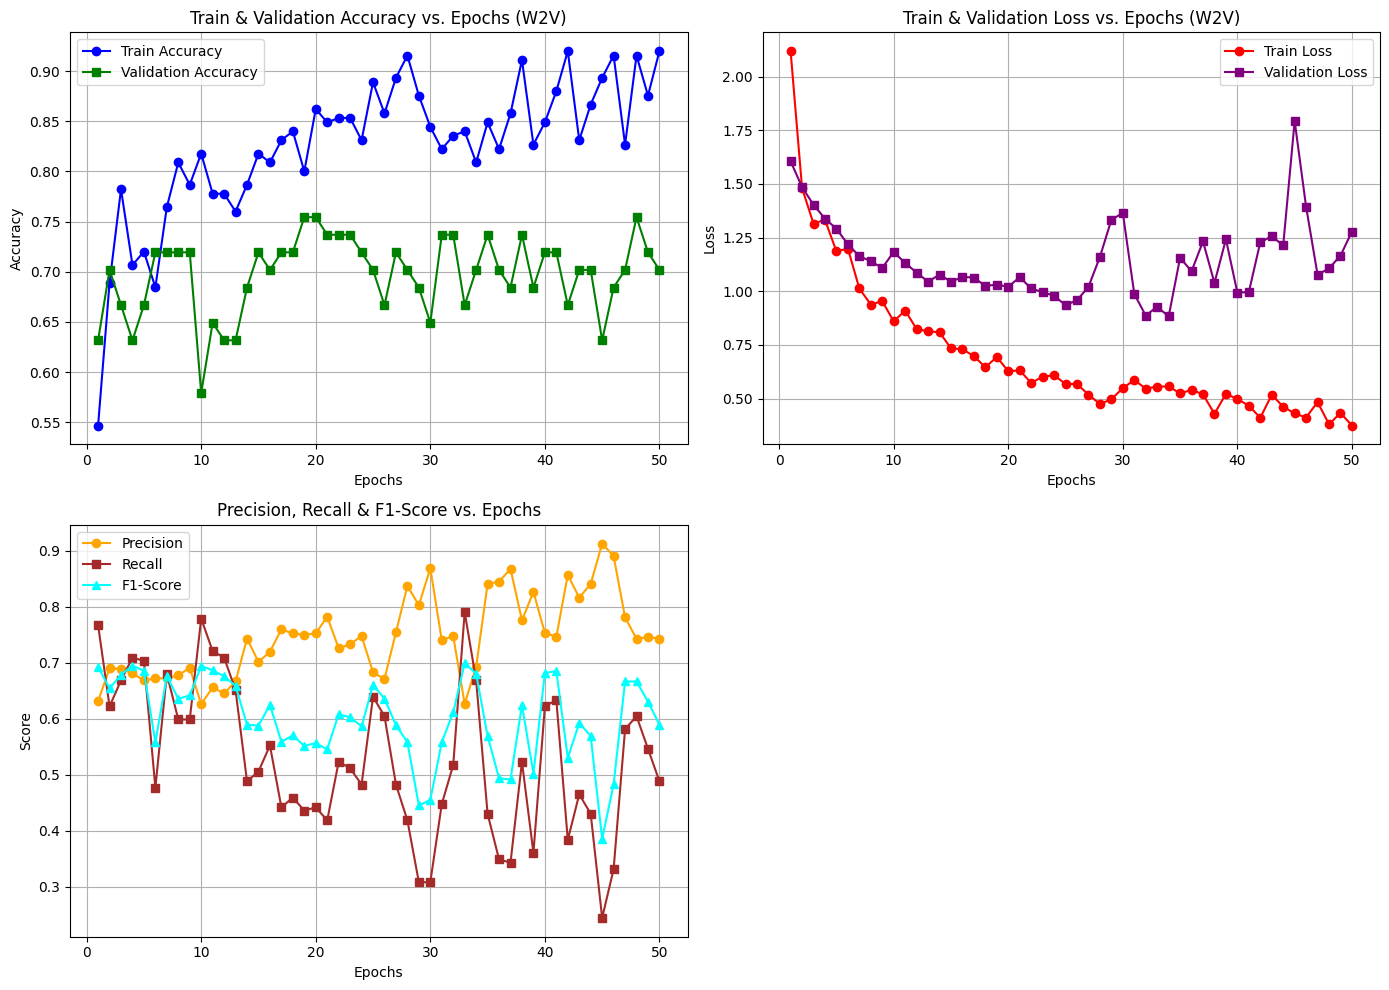

In [38]:
import matplotlib.pyplot as plt

# Ki·ªÉm tra v√† tr√≠ch xu·∫•t d·ªØ li·ªáu t·ª´ history_dict
epochs_values = list(history_dict.keys())

train_acc = [history_dict[ep].get("accuracy", None) for ep in epochs_values]
val_acc = [history_dict[ep].get("val_accuracy", None) for ep in epochs_values]
train_loss = [history_dict[ep].get("loss", None) for ep in epochs_values]
val_loss = [history_dict[ep].get("val_loss", None) for ep in epochs_values]
precision = [history_dict[ep].get("precision", None) for ep in epochs_values]
recall = [history_dict[ep].get("recall", None) for ep in epochs_values]
f1_score = [history_dict[ep].get("f1-score", None) for ep in epochs_values]

# T·∫°o bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# V·∫Ω bi·ªÉu ƒë·ªì Accuracy
axes[0, 0].plot(epochs_values, train_acc, marker='o', label="Train Accuracy", color='b')
axes[0, 0].plot(epochs_values, val_acc, marker='s', label="Validation Accuracy", color='g')
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Train & Validation Accuracy vs. Epochs (W2V)")
axes[0, 0].legend()
axes[0, 0].grid()

# V·∫Ω bi·ªÉu ƒë·ªì Loss
axes[0, 1].plot(epochs_values, train_loss, marker='o', label="Train Loss", color='r')
axes[0, 1].plot(epochs_values, val_loss, marker='s', label="Validation Loss", color='purple')
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].set_title("Train & Validation Loss vs. Epochs (W2V)")
axes[0, 1].legend()
axes[0, 1].grid()

# V·∫Ω bi·ªÉu ƒë·ªì Precision, Recall, F1-score
axes[1, 0].plot(epochs_values, precision, marker='o', label="Precision", color='orange')
axes[1, 0].plot(epochs_values, recall, marker='s', label="Recall", color='brown')
axes[1, 0].plot(epochs_values, f1_score, marker='^', label="F1-Score", color='cyan')
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("Score")
axes[1, 0].set_title("Precision, Recall & F1-Score vs. Epochs")
axes[1, 0].legend()
axes[1, 0].grid()

# ·∫®n √¥ tr·ªëng (n·∫øu c√≥)
axes[1, 1].axis("off")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


In [39]:
from sklearn.metrics import classification_report

# üîπ 1. D·ª± ƒëo√°n tr√™n t·∫≠p test
y_pred = (model.predict([X_test, X_test_traditional]) > 0.5).astype("int32")

# üîπ 2. In b√°o c√°o k·∫øt qu·∫£
print(classification_report(y_test, y_pred))


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       170
           1       0.74      0.49      0.59       172

    accuracy                           0.66       342
   macro avg       0.68      0.66      0.65       342
weighted avg       0.68      0.66      0.65       342



## PP2: Kh√¥ng s·ª≠ d·ª•ng Word2Vec

Sau khi ph√¢n t√≠ch AST th√¨ chuy·ªÉn Token vector -> Integer vector. Sau ƒë√≥ ƒë∆∞a qua Embedding layer trong m·∫°ng hu·∫•n luy·ªán

### Token vector -> integer vector

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Chuy·ªÉn danh s√°ch tokens v·ªÅ d·∫°ng chu·ªói vƒÉn b·∫£n (v√¨ Tokenizer c·∫ßn chu·ªói)
train_texts = [" ".join(tokens) for tokens in train_tokens.values()]
val_texts = [" ".join(tokens) for tokens in val_tokens.values()]
test_texts = [" ".join(tokens) for tokens in test_tokens.values()]

# T·∫°o Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

# S·ªë l∆∞·ª£ng t·ª´ (Vocabulary size)
vocab_size = len(tokenizer.word_index) + 1  # +1 ƒë·ªÉ d√†nh cho padding

# M√£ h√≥a th√†nh s·ªë
X_train_seq = tokenizer.texts_to_sequences(train_texts)
X_val_seq = tokenizer.texts_to_sequences(val_texts)
X_test_seq = tokenizer.texts_to_sequences(test_texts)

# Padding ƒë·ªÉ t·∫•t c·∫£ c√≥ ƒë·ªô d√†i MAX_SEQUENCE_LENGTH
X_train = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_val = pad_sequences(X_val_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


## M√¥ h√¨nh hu·∫•n luy·ªán

In [41]:
from tensorflow.keras.layers import Embedding

# Input l√† chu·ªói s·ªë nguy√™n
input_layer_cnn = Input(shape=(MAX_SEQUENCE_LENGTH,))  # (None, 100)

# Embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(input_layer_cnn)

# CNN
conv_layer_1 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(embedding_layer)
batch_norm_1 = BatchNormalization()(conv_layer_1)
conv_layer_2 = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(batch_norm_1)
batch_norm_2 = BatchNormalization()(conv_layer_2)
pool_layer = GlobalMaxPooling1D()(batch_norm_2)
dense_layer = Dense(DENSE_UNITS, activation='relu')(pool_layer)
dropout_layer = Dropout(DROPOUT_RATE)(dense_layer)

# Truy·ªÅn th·ªëng + CNN
input_layer_traditional = Input(shape=(NUM_TRADITIONAL_FEATURES,))
merged_features = Concatenate()([dropout_layer, input_layer_traditional])
dense_2_layer = Dense(DENSE_UNITS, activation='relu', kernel_regularizer=l2(0.01))(merged_features)
output_layer = Dense(1, activation='sigmoid')(dense_2_layer)

# Model
model = Model(inputs=[input_layer_cnn, input_layer_traditional], outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy', metrics=['accuracy'])

# S·ª≠ d·ª•ng ReduceLROnPlateau callback ƒë·ªÉ ƒëi·ªÅu ch·ªânh learning rate khi c·∫ßn thi·∫øt
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Hi·ªÉn th·ªã ki·∫øn tr√∫c m√¥ h√¨nh
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_7             ‚îÇ (None, 100)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding (Embedding)     ‚îÇ (None, 100, 30)        ‚îÇ         59,640 ‚îÇ input_layer_7[0][0]    ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_6 (Conv1D)         ‚îÇ (None, 96, 250)        ‚îÇ         37,750 ‚îÇ embedding[0][0]        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2     ‚îÇ (None, 96, 250)        ‚îÇ          1,000 ‚îÇ conv1d_6[0][0]         ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_7 (Conv1D)         ‚îÇ (None, 92, 250)        ‚îÇ        312,750 ‚îÇ batch_normalization_2‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3     ‚îÇ (None, 92, 250)        ‚îÇ          1,000 ‚îÇ conv1d_7[0][0]         ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d_1    ‚îÇ (None, 250)            ‚îÇ              0 ‚îÇ batch_normalization_3‚Ä¶ ‚îÇ
‚îÇ (GlobalMaxPooling1D)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)           ‚îÇ (None, 100)            ‚îÇ         25,100 ‚îÇ global_max_pooling1d_‚Ä¶ ‚îÇ
‚î

 Total params: 449,441 (1.71 MB)

 Trainable params: 448,441 (1.71 MB)

 Non-trainable params: 1,000 (3.91 KB)

In [42]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report

# üîπ S·ªë epochs ƒë·ªÉ hu·∫•n luy·ªán
epochs = 50
history_dict = {}

# üîπ T·∫°o callback ƒë·ªÉ in k·∫øt qu·∫£ sau m·ªói epoch
class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # D·ª± ƒëo√°n tr√™n t·∫≠p test ngay sau epoch hi·ªán t·∫°i
        y_pred = (self.model.predict([X_test, X_test_traditional]) > 0.5).astype("int32")

        # T√≠nh Classification Report ƒë√∫ng c√°ch
        report = classification_report(y_test, y_pred, output_dict=True)

        # L∆∞u l·ªãch s·ª≠ t·ª´ng epoch
        history_dict[epoch + 1] = {
            "accuracy": logs["accuracy"],
            "val_accuracy": logs["val_accuracy"],
            "loss": logs["loss"],
            "val_loss": logs["val_loss"],
            "precision": report["1"]["precision"] if "1" in report else 0,
            "recall": report["1"]["recall"] if "1" in report else 0,
            "f1-score": report["1"]["f1-score"] if "1" in report else 0
        }

        # üî• In k·∫øt qu·∫£ sau m·ªói epoch
        print(f"\nüìå Epoch {epoch + 1}/{epochs} - "
              f"Accuracy: {logs['accuracy']:.4f}, "
              f"Loss: {logs['loss']:.4f}, "
              f"Val Accuracy: {logs['val_accuracy']:.4f}, "
              f"Val Loss: {logs['val_loss']:.4f}, "
              f"Precision: {history_dict[epoch + 1]['precision']:.4f}, "
              f"Recall: {history_dict[epoch + 1]['recall']:.4f}, "
              f"F1-score: {history_dict[epoch + 1]['f1-score']:.4f}")

# üîπ Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi callback t√πy ch·ªânh
history = model.fit(
    [X_train, X_train_traditional], y_train,
    validation_data=([X_val, X_val_traditional], y_val),
    epochs=epochs, batch_size=32, verbose=0,
    callbacks=[MetricsCallback()]
)

# üîπ In to√†n b·ªô l·ªãch s·ª≠ sau khi hu·∫•n luy·ªán xong
print("\nüìä History Dict:")
print(history_dict)


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 86ms/step

üìå Epoch 1/50 - Accuracy: 0.5956, Loss: 1.9299, Val Accuracy: 0.7719, Val Loss: 1.6339, Precision: 0.6415, Recall: 0.3953, F1-score: 0.4892
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

üìå Epoch 2/50 - Accuracy: 0.7244, Loss: 1.4487, Val Accuracy: 0.7193, Val Loss: 1.5494, Precision: 0.6481, Recall: 0.4070, F1-score: 0.5000
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

üìå Epoch 3/50 - Accuracy: 0.8311, Loss: 1.2794, Val Accuracy: 0.7193, Val Loss: 1.4723, Precision: 0.6306, Recall: 0.4070, F1-score: 0.4947
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

üìå Epoch 4/50 - Accuracy: 0.8133, Loss: 1.1939, Val Accuracy: 0.7368, Val Loss: 1.4045, Precision: 0.6429, Recall: 0.4186, F1-score: 0.5070
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step

üìå Epoch 5/50 - Accuracy:

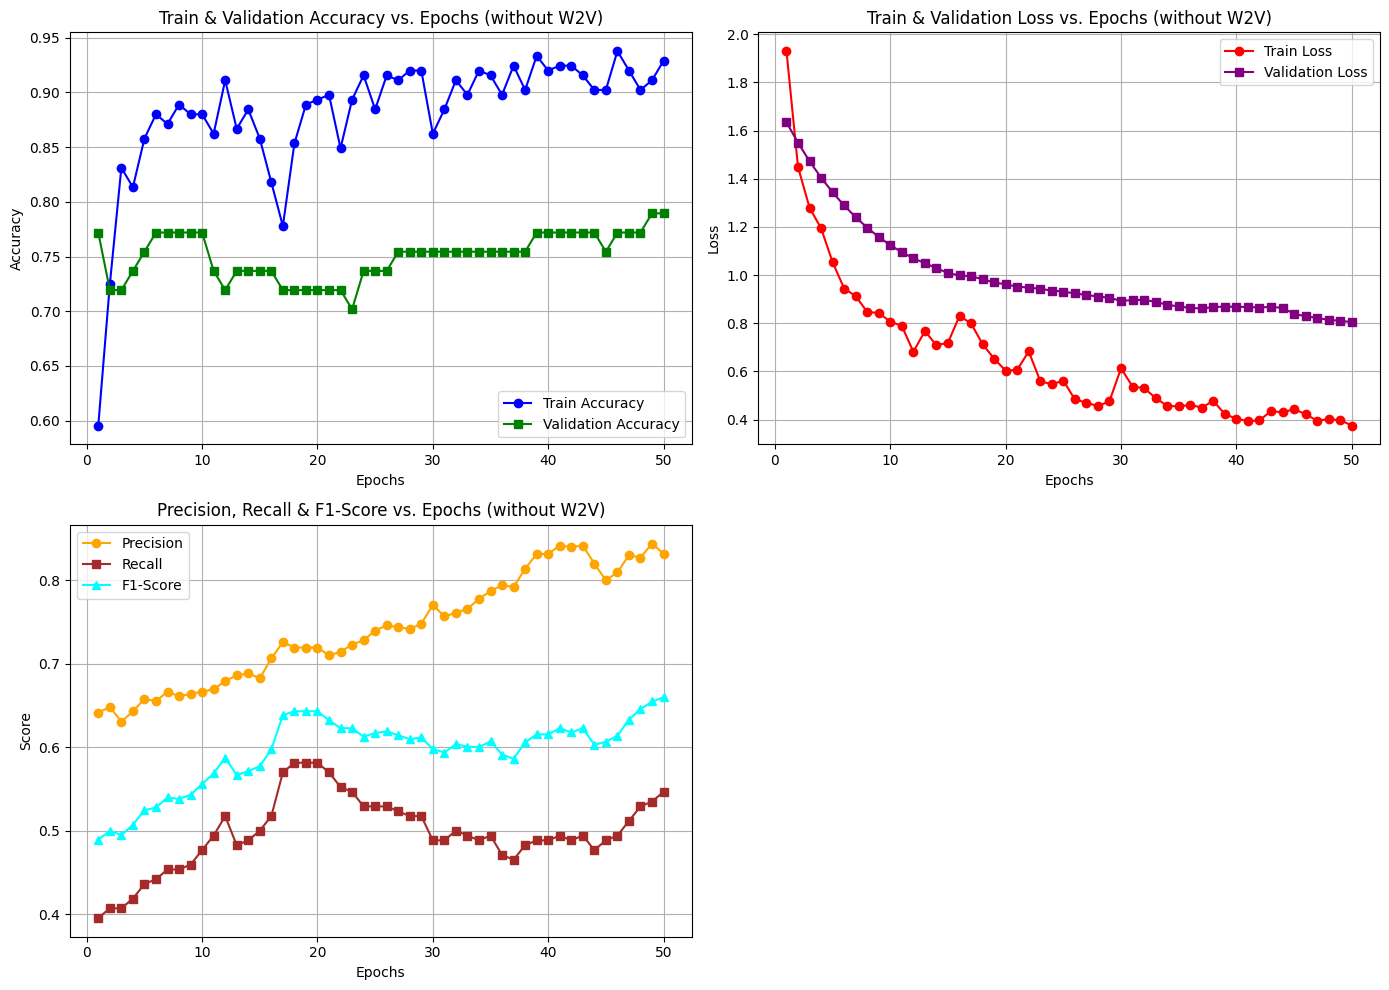

In [43]:
import matplotlib.pyplot as plt

# Ki·ªÉm tra v√† tr√≠ch xu·∫•t d·ªØ li·ªáu t·ª´ history_dict
epochs_values = list(history_dict.keys())

train_acc = [history_dict[ep].get("accuracy", None) for ep in epochs_values]
val_acc = [history_dict[ep].get("val_accuracy", None) for ep in epochs_values]
train_loss = [history_dict[ep].get("loss", None) for ep in epochs_values]
val_loss = [history_dict[ep].get("val_loss", None) for ep in epochs_values]
precision = [history_dict[ep].get("precision", None) for ep in epochs_values]
recall = [history_dict[ep].get("recall", None) for ep in epochs_values]
f1_score = [history_dict[ep].get("f1-score", None) for ep in epochs_values]

# T·∫°o bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# üîπ 1. V·∫Ω bi·ªÉu ƒë·ªì Accuracy
axes[0, 0].plot(epochs_values, train_acc, marker='o', label="Train Accuracy", color='b')
axes[0, 0].plot(epochs_values, val_acc, marker='s', label="Validation Accuracy", color='g')
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Train & Validation Accuracy vs. Epochs (without W2V)")
axes[0, 0].legend()
axes[0, 0].grid()

# üîπ 2. V·∫Ω bi·ªÉu ƒë·ªì Loss
axes[0, 1].plot(epochs_values, train_loss, marker='o', label="Train Loss", color='r')
axes[0, 1].plot(epochs_values, val_loss, marker='s', label="Validation Loss", color='purple')
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].set_title("Train & Validation Loss vs. Epochs (without W2V)")
axes[0, 1].legend()
axes[0, 1].grid()

# üîπ 3. V·∫Ω bi·ªÉu ƒë·ªì Precision, Recall, F1-score
axes[1, 0].plot(epochs_values, precision, marker='o', label="Precision", color='orange')
axes[1, 0].plot(epochs_values, recall, marker='s', label="Recall", color='brown')
axes[1, 0].plot(epochs_values, f1_score, marker='^', label="F1-Score", color='cyan')
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("Score")
axes[1, 0].set_title("Precision, Recall & F1-Score vs. Epochs (without W2V)")
axes[1, 0].legend()
axes[1, 0].grid()

# ·∫®n √¥ tr·ªëng (n·∫øu c√≥)
axes[1, 1].axis("off")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()


## TH·ª¨ BUILD M√î H√åNH ƒê∆†N GI·∫¢N GI·ªêNG TRONG B√ÄI B√ÅO

In [51]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# üîπ S·ªë epochs ƒë·ªÉ hu·∫•n luy·ªán
epochs = 50
history_dict = {}

# üîπ C·∫≠p nh·∫≠t c√°c tham s·ªë cho m√¥ h√¨nh
FILTERS = 250
KERNEL_SIZE = 5
DENSE_UNITS = 100
DROPOUT_RATE = 0.05
LEARNING_RATE = 0.005
NUM_TRADITIONAL_FEATURES = X_train_traditional.shape[1]  # S·ªë ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 30
vocab_size = len(tokenizer.word_index) + 1  # C·∫≠p nh·∫≠t vocab_size t·ª´ tokenizer

# ƒê·ªãnh nghƒ©a m√¥ h√¨nh v·ªõi Embedding layer cho token
input_layer_cnn = Input(shape=(MAX_SEQUENCE_LENGTH,))  # (None, 100)
embedding_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)(input_layer_cnn)

# L·ªõp Conv1D v√† MaxPooling
conv_layer = Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu')(embedding_layer)
pool_layer = GlobalMaxPooling1D()(conv_layer)

# L·ªõp Fully Connected (FC)
dense_layer = Dense(DENSE_UNITS, activation='relu')(pool_layer)
dropout_layer = Dropout(DROPOUT_RATE)(dense_layer)

# K·∫øt h·ª£p v·ªõi c√°c ƒë·∫∑c tr∆∞ng truy·ªÅn th·ªëng
input_layer_traditional = Input(shape=(NUM_TRADITIONAL_FEATURES,))
merged_features = Concatenate()([dropout_layer, input_layer_traditional])

# L·ªõp Output (Sigmoid)
output_layer = Dense(1, activation='sigmoid')(merged_features)

# T·∫°o m√¥ h√¨nh t·ªïng h·ª£p
model = Model(inputs=[input_layer_cnn, input_layer_traditional], outputs=output_layer)

# Compile m√¥ h√¨nh v·ªõi learning rate th·∫•p h∆°n
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
# üîπ T·∫°o callback ƒë·ªÉ in k·∫øt qu·∫£ sau m·ªói epoch
class MetricsCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # D·ª± ƒëo√°n tr√™n t·∫≠p test ngay sau epoch hi·ªán t·∫°i
        y_pred = (self.model.predict([X_test, X_test_traditional]) > 0.5).astype("int32")

        # T√≠nh Classification Report ƒë√∫ng c√°ch
        report = classification_report(y_test, y_pred, output_dict=True)

        # L∆∞u l·ªãch s·ª≠ t·ª´ng epoch
        history_dict[epoch + 1] = {
            "accuracy": logs["accuracy"],
            "val_accuracy": logs["val_accuracy"],
            "loss": logs["loss"],
            "val_loss": logs["val_loss"],
            "precision": report["1"]["precision"] if "1" in report else 0,
            "recall": report["1"]["recall"] if "1" in report else 0,
            "f1-score": report["1"]["f1-score"] if "1" in report else 0
        }

        # üî• In k·∫øt qu·∫£ sau m·ªói epoch
        print(f"\nüìå Epoch {epoch + 1}/{epochs} - "
              f"Accuracy: {logs['accuracy']:.4f}, "
              f"Loss: {logs['loss']:.4f}, "
              f"Val Accuracy: {logs['val_accuracy']:.4f}, "
              f"Val Loss: {logs['val_loss']:.4f}, "
              f"Precision: {history_dict[epoch + 1]['precision']:.4f}, "
              f"Recall: {history_dict[epoch + 1]['recall']:.4f}, "
              f"F1-score: {history_dict[epoch + 1]['f1-score']:.4f}")

# üîπ Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi callback t√πy ch·ªânh
history = model.fit(
    [X_train, X_train_traditional], y_train,
    validation_data=([X_val, X_val_traditional], y_val),
    epochs=epochs, batch_size=32, verbose=0,
    callbacks=[MetricsCallback()]
)

# üîπ In to√†n b·ªô l·ªãch s·ª≠ sau khi hu·∫•n luy·ªán xong
print("\nüìä History Dict:")
print(history_dict)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_15            ‚îÇ (None, 100)            ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_4 (Embedding)   ‚îÇ (None, 100, 30)        ‚îÇ         59,640 ‚îÇ input_layer_15[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv1d_11 (Conv1D)        ‚îÇ (None, 96, 250)        ‚îÇ         37,750 ‚îÇ embedding_4[0][0]      ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_max_pooling1d_5    ‚îÇ (None, 250)            ‚îÇ              0 ‚îÇ conv1d_11[0][0]        ‚îÇ
‚îÇ (GlobalMaxPooling1D)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_12 (Dense)          ‚îÇ (None, 100)            ‚îÇ         25,100 ‚îÇ global_max_pooling1d_‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)       ‚îÇ (None, 100)            ‚îÇ              0 ‚îÇ dense_12[0][0]         ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ input_layer_16            ‚îÇ (None, 20)             ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ concatenate_5             ‚îÇ (None, 120)            ‚îÇ              0 ‚îÇ dropout_5[0][0],       ‚îÇ
‚îÇ (Concatenate)             ‚îÇ                        ‚îÇ                ‚îÇ input_layer_16[0][0]   ‚îÇ
‚îú‚îÄ

 Total params: 122,611 (478.95 KB)

 Trainable params: 122,611 (478.95 KB)

 Non-trainable params: 0 (0.00 B)

11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 23ms/step

üìå Epoch 1/50 - Accuracy: 0.6089, Loss: 0.6437, Val Accuracy: 0.6316, Val Loss: 0.6844, Precision: 0.6994, Recall: 0.7035, F1-score: 0.7014
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step

üìå Epoch 2/50 - Accuracy: 0.6711, Loss: 0.5941, Val Accuracy: 0.7018, Val Loss: 0.6603, Precision: 0.7969, Recall: 0.5930, F1-score: 0.6800
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step

üìå Epoch 3/50 - Accuracy: 0.7022, Loss: 0.5565, Val Accuracy: 0.6842, Val Loss: 0.6583, Precision: 0.8430, Recall: 0.5930, F1-score: 0.6962
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step

üìå Epoch 4/50 - Accuracy: 0.7867, Loss: 0.4459, Val Accuracy: 0.6667, Val Loss: 0.6336, Precision: 0.8072, Recall: 0.7791, F1-score: 0.7929
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step

üìå Epoch 5/50 - Accuracy: 0

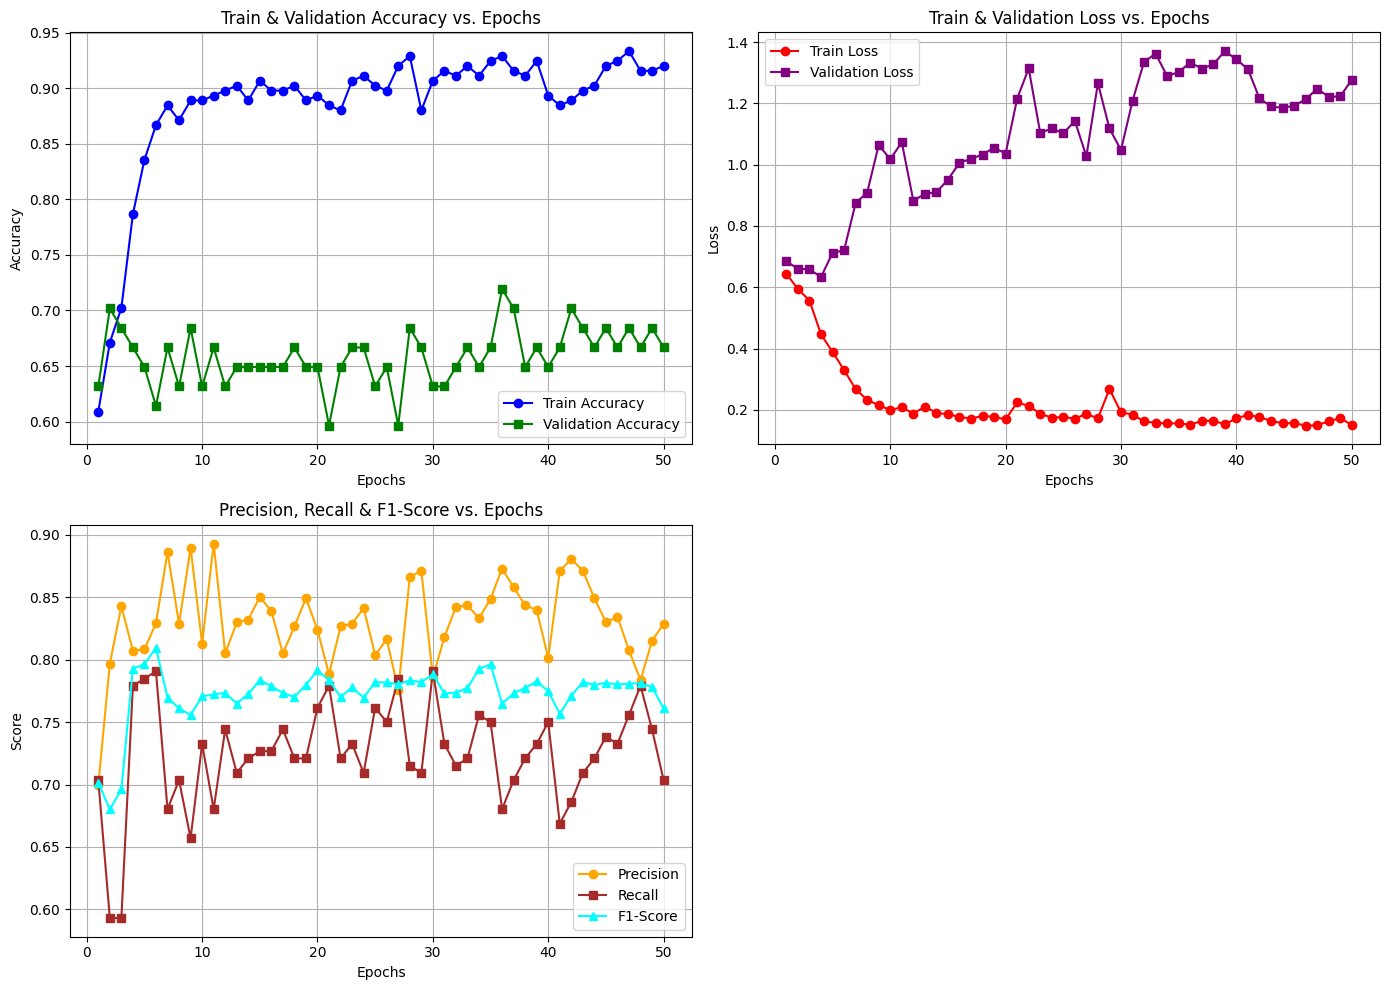

In [53]:
import matplotlib.pyplot as plt

# Ki·ªÉm tra v√† tr√≠ch xu·∫•t d·ªØ li·ªáu t·ª´ history_dict
epochs_values = list(history_dict.keys())

train_acc = [history_dict[ep].get("accuracy", None) for ep in epochs_values]
val_acc = [history_dict[ep].get("val_accuracy", None) for ep in epochs_values]
train_loss = [history_dict[ep].get("loss", None) for ep in epochs_values]
val_loss = [history_dict[ep].get("val_loss", None) for ep in epochs_values]
precision = [history_dict[ep].get("precision", None) for ep in epochs_values]
recall = [history_dict[ep].get("recall", None) for ep in epochs_values]
f1_score = [history_dict[ep].get("f1-score", None) for ep in epochs_values]

# T·∫°o bi·ªÉu ƒë·ªì
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# üîπ 1. V·∫Ω bi·ªÉu ƒë·ªì Accuracy
axes[0, 0].plot(epochs_values, train_acc, marker='o', label="Train Accuracy", color='b')
axes[0, 0].plot(epochs_values, val_acc, marker='s', label="Validation Accuracy", color='g')
axes[0, 0].set_xlabel("Epochs")
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_title("Train & Validation Accuracy vs. Epochs")
axes[0, 0].legend()
axes[0, 0].grid()

# üîπ 2. V·∫Ω bi·ªÉu ƒë·ªì Loss
axes[0, 1].plot(epochs_values, train_loss, marker='o', label="Train Loss", color='r')
axes[0, 1].plot(epochs_values, val_loss, marker='s', label="Validation Loss", color='purple')
axes[0, 1].set_xlabel("Epochs")
axes[0, 1].set_ylabel("Loss")
axes[0, 1].set_title("Train & Validation Loss vs. Epochs")
axes[0, 1].legend()
axes[0, 1].grid()

# üîπ 3. V·∫Ω bi·ªÉu ƒë·ªì Precision, Recall, F1-score
axes[1, 0].plot(epochs_values, precision, marker='o', label="Precision", color='orange')
axes[1, 0].plot(epochs_values, recall, marker='s', label="Recall", color='brown')
axes[1, 0].plot(epochs_values, f1_score, marker='^', label="F1-Score", color='cyan')
axes[1, 0].set_xlabel("Epochs")
axes[1, 0].set_ylabel("Score")
axes[1, 0].set_title("Precision, Recall & F1-Score vs. Epochs")
axes[1, 0].legend()
axes[1, 0].grid()

# ·∫®n √¥ tr·ªëng (n·∫øu c√≥)
axes[1, 1].axis("off")

# Hi·ªÉn th·ªã bi·ªÉu ƒë·ªì
plt.tight_layout()
plt.show()
